# DAY 4 MODEL IMPROVEMENT AND EXPLAINABILITY

In [36]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\user\Nairobi_House_Price_Sprint\data\clean_listings.csv")

# Quick check
df.head()

,Location,Property Type,Bedrooms,Bathrooms,Size (sqm),Amenities,Price (KES),Listing Date,size_sqft,price_per_sqft,amenity_score,month,year,log_price
0,runda,House,5.0,5.0,518.000000,"Alarm, BBQ, Backup Generator, Balcony, Borehol...",155040000,2025-10-21,5575.700200,27806.373090,21,10,2025,18.859194
1,lavington,House,4.0,4.0,284.941176,"Aircon, Alarm, BBQ, Balcony, Borehole, Bus Sto...",75000000,2026-02-17,3067.078329,24453.239189,23,2,2026,18.132999
2,lavington,House,5.0,5.0,284.941176,"Alarm, BBQ, Backup Generator, Balcony, Borehol...",100000000,2026-02-16,3067.078329,32604.318918,24,2,2026,18.420681
3,karen,House,5.0,7.0,194.000000,"Balcony, Bus Stop, Fibre Internet, Gated Commu...",130000000,2026-02-14,2088.196600,62254.674680,11,2,2026,18.683045
4,lavington,House,5.0,6.0,284.941176,"Aircon, Alarm, BBQ, Backup Generator, Balcony,...",75000000,2026-02-13,3067.078329,24453.239189,24,2,2026,18.132999


In [37]:
from sklearn.model_selection import train_test_split

X = df[["Bedrooms", "Bathrooms", "Size (sqm)", "amenity_score"]]
y = df["Price (KES)"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Results")
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)

Random Forest Results
MAE: 20001697.060931895
RMSE: 36280572.573816925
R2: 0.3937532648864982


### Xboost (OPTIONAL)

In [39]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Results")
print("MAE:", xgb_mae)
print("RMSE:", xgb_rmse)
print("R2:", xgb_r2)

XGBoost Results
MAE: 20757207.93548387
RMSE: 37935248.10025105
R2: 0.33719325065612793


### Model Comparison Table

In [40]:
comparison = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "MAE (KES)": [rf_mae, xgb_mae],
    "RMSE (KES)": [rf_rmse, xgb_rmse],
    "R2 Score": [rf_r2, xgb_r2]
})

comparison.sort_values("R2 Score", ascending=False)

,Model,MAE (KES),RMSE (KES),R2 Score
0,Random Forest,2.000170e+07,3.628057e+07,0.393753
1,XGBoost,2.075721e+07,3.793525e+07,0.337193


### Feature Importance Plots

<Figure size 640x480 with 0 Axes>

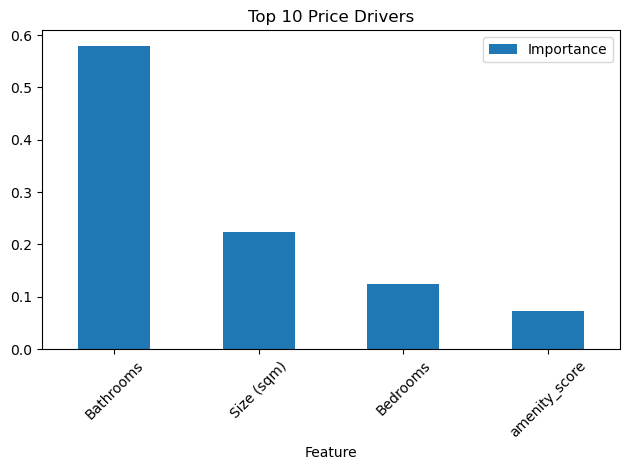

In [41]:
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Plot Top 10
plt.figure()
importance_df.head(10).plot(
    x="Feature",
    y="Importance",
    kind="bar"
)
plt.title("Top 10 Price Drivers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Identify Top 5 Price Drivers
top_5 = importance_df.head(5)
top_5

,Feature,Importance
1,Bathrooms,0.580166
2,Size (sqm),0.222970
0,Bedrooms,0.124049
3,amenity_score,0.072814


In [35]:
# Save Model
import joblib

# Choose best model based on R2
best_model = xgb if xgb_r2 > rf_r2 else rf

joblib.dump(best_model, "model.pkl")

print("✅ Model saved as model.pkl")

✅ Model saved as model.pkl


#### KEY TAKEAWAYS
>- In the Nairobi property market, bathrooms count is the dominant price driver, size and bedrooms provide moderate added value, and amenity score contribute minimal additional explanatory power once size is accounted for.

1. Bathrooms Dominates Pricing

2.  Size and bedrooms Add Premium

3. Luxury features increase price but act as secondary enhancers rather than primary drivers.